# USC INF 510 Fall 2019 Project by Kirsten Fure

## 1. by Kirsten Fure

In [75]:
from IPython.display import Image

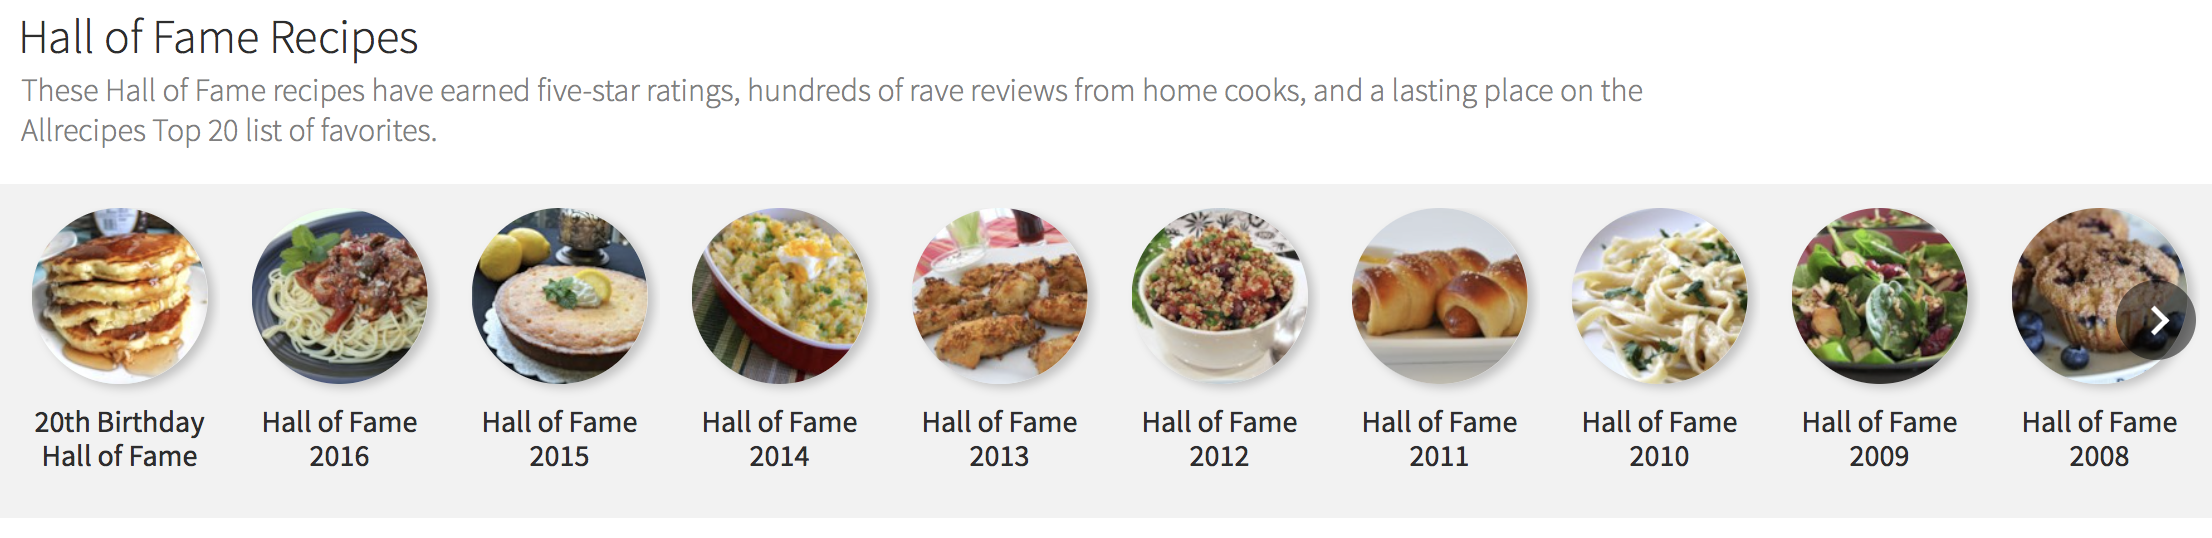

In [76]:
Image('ss.png')

## 2. How to run project code:
    
To run this project using the SQLite databases, make sure the necessary python packages are installed, and then simply clone the repo at https://github.com/kfure/USC-INF510-Project---Recipe-and-Nutrition-Analysis and execute this notebook. 
 - The database "recipes.db" is in the /data folder within the github repository.
 - There is an environment.yml file in the github repo that has the associated environment for this project.

This project requires the following packages:
 - wordcloud, numpy, pillow, matplotlib, plotnine, pygal, cairo, beautiful soup, requests
 
 - If you would like to see interactive PyGal graphs in a browser, you can uncomment **line_chart.render_in_browser()** and execute.

 - If you would like to run the webscrapers and API for this project, you will need an Edamam API Key and Edamam API ID to insert into the parameters. When you have that, go to the very end of this program, create a new cell, enter main('remote',<your API key/ID parameters>) and execute. This will execute all the web-scraping and API code and create and populate the database "Recipes.db" in your environment.

## 3. Things that could be improved:
 - The colorful plot showing the top nutrient-dense recipes is squishing recipe titles together. I did work to  make sure the titles were not overlapping, but they are very tight. If I had more time, I would figure out a way to display this data so the recipe titles are even easier to read.
 - Many recipe creators did not have a home location on their profile. I was hoping to do analaysis looking for possible correlations among location and recipes, ingredients or health trends. But, the location data was not consistent enough to include.

## 4. Other problems/notes:

I had some trouble installing PyGal in anaconda. I did it through pip and had to install cairo and that seemed to solve it. 

I tried to write the code for easy readability so it is not in condensed python style, but I could re-write this in a condensed more pythonic style and it would be much shorter!

## 5. Project Overview:

I am interested in cooking and nutrition, so I decided to analyize popular recipes, their overall trends, and any related nutritional analysis. I chose to use AllRecipes.com, which is a community recipe collection and sharing website (vs. a collection of recipes created by professional chefs). I wanted to focus on the community and their trends. For the last 20 years, AllRecipes has produced an annual "Hall of Fame" Top 20 recipes list for that year. I webscraped those top recipes for the entire collection, which included every year from 1997 to 2017. I gathered relevant information for each recipe such as recipe title, ingredients, category, number of reviews, overall rating, the recipe creator's location (city/state/country), etc... 

Here is the base website:

https://www.allrecipes.com/recipes/14452/everyday-cooking/special-collections/hall-of-fame/	

I collected and formatted this information, so I could send it to the Edamam API, which sent back 
comprehensive nutrient information based upon each recipe's ingredients that I sent. I calculated 
the per serving nutrient values based upon each recipe's number of servings (yield). 

I then webscraped the USDA's recommended daily percentage of nutrients website and used that 
information to calculate each recipe's per serving nutrient percentages, linking up
with the nutrient name. 

I put all the information into related SQLite databases joining them based upon their primary/foreign key commanilites, which is either a recipe id, fame year, ingredient id, or nutrient id.

I did analysis on the recipes looking for trends in their ingredients, popularity and 
healthiness as a whole and over the span of the last 20 year, using Pandas dataframes, python lists, tuples and dictionaries. 

## 6. Discoveries and Conclusions:

I found that popular ingredients did change over the years. When I anlayzed single ingredient words, I found that words associated with baking goods, such as sugar, flour and butter were more popular in the 90s than now. The current popular ingredient words are more savory like chicken, cheese and sauce. 

Interestingly, when I looked at statistics of ingredients phrases, not just their single words (for example "white sugar" instead of "white" and "sugar separately, overall throughout all the years, many baking ingredients still come out on top. All-purpose flour, butter, eggs, garlic, salt, vanilla extract and white sugar top the list, but their popularities change through the 20 year period.

When I began looking at nutrition and trends over time, I noticed a correlation in the popularity of carb content and sugar content in recipes. When carb contents rose, the sugar content also seems to rise over time. They both peaked around 2002 and hit a low around 2014. For fat content, both saturated fat and total fat fluctated without a decisive trend, except that the 90s really were the low-fat craze!!

I decided that analyzing each nutrient, vitamin and mineral separately would be too detailed for this particular project, so I developed a "nutrient score" algorithm which I applied to each recipe. The algorithm compiles all nutrient information per recipe and gives points for each nutrient based on what percent it delivers compared to the USDA's recommended daily amount. Note that the nutrient score did not include fat, calories, carb or sugar content. It is related to the vitamin and mineral content, and the higher the nutrient score, the more nutritious the reipce is. 2012 proved to be the stand-out year with the most nutritious recipes, and the 90s had the lowest nutritious recipes.

I am curious which nutrients our community has the hardest time getting through our favorite recipes. This could give us insight on which vitamins we need to focus on adding to our diet. I looked at the averages of all vitamins and minerals per year and then compared them. Vitamin D was the lowest for every year except 3 of the years! Excluding Vitamin D, other culprits that our favorite recipes run the most low on were: fiber for 8 years, potassium for 7 years, vitamin C for 4 years and calcium for 2 years. 

Because different people have different diet goals, I created a chart to show the top 30 nutritious recipes, based upon their nutrient score. Then, the chart shows for each of those recipes, their saturated fat content, sugar content and number of reviews. People can look at this chart and choose popular recipes that are nutritious and make choices upon fat content and sugar content.

Finally, I produced a list of 25 nutritious recipes (according to my "nutrient score") that are rated highly, popular, and low in saturated fat for those interested in heart health and general health, but want tasty food.

 - Sweet Potato and Black Bean Chili
 - Cha Cha's White Chicken Chili
 - Chef John's Caramel Chicken
 - Slow Cooker Beef Pot Roast
 - Baked Pork Chops I
 - Baked Teriyaki Chicken
 - Blackened Salmon Tacos with Chunky Mango Avoca...
 - Breaded Pork Tenderloin
 - Slow Cooker Beef Stew I
 - Perfect Turkey
 - Homestyle Turkey, the Michigander Way
 - Stuffed Green Peppers I
 - Awesome Slow Cooker Pot Roast
 - Healthy Mexican Chicken Bake
 - One Skillet Mexican Quinoa
 - Just Like Wendy's® Chili
 - Strawberry Spinach Salad I
 - Heather's Grilled Salmon
 - Barbecued Beef
 - Zesty Slow Cooker Chicken Barbecue
 -  Chef John's Stuffed Peppers
 - Mozzarella-Stuffed Pesto Turkey Meatballs
 - Awesome Sausage, Apple and Cranberry Stuffing
 - Chicken Cacciatore in a Slow Cooker

## 7. Difficulties I encountered:

I originally planned to use the USDA's nutrition API database to get nutrient information, but for every ingredient they offer a multitude of options to match on. (For example, squash could be many different varieties and it could be raw, cooked, roasted, sweetened, canned, mashed, etc... which all have different nutrient information.) This complexity was going require alot of programming decision making in order to decide which USDA ingredient was the best match for the recipe's ingredient. Then, I would also have to calculate the nutrient amount in each recipe using the amount of the ingredient the recipe calls for vs the amount the USDA is in. Many conversions for grams, cups, ounces, etc.. would be involved. Ultimately, I decided to look into other APIs that are built off of the USDA engine and found several options. I chose Edamam because of its comprehensive list of nutrient information. 

The edamam API was good, but I did find times where the information was not complete. For example, I found that the sugar_added was not accurate. I compared the values with recipe ingredients, and I did not trust the results. I saw several times when the sugar_added was zero and the recipe clearly had sugar as an ingredient. So, I switched my program to rely on their total sugar content instead, which proved to be consistent and correct. There were a few other cases like this, but I tested results and data and made sure what I used was accurate.

Also, certain words included in ingredients would throw Edamam off and it would not return a match. So, I created a list of stopwords and stripped these from ingredients.

Edamam offers some diet and health categories, such as balanced, low-fat, low-sugar, etc... which I was hoping to utilize, but I found many of them to be inconsistent, so I relied on my individual nutrient data rather than the labels they offered. 

## 8. Skills I learned:

I was not familiar with the concept of APIs and how to interact with them. But, through this class and this project, I am much more comfortable with the concept and now realize how many there are! These can be a big help in creating applications where you need an on-going specific data source. I also did not know how to do web-scraping and learned how fragile the environment can be as companies can change their websites at any moment without any documentation or warning. I wish I had more experience going into this class with github and the command line.  

## 9. Ideas for project expansions / next steps:

 - I would include tons of recipes with recipe-creator location data so I can analyze trends in ingredients, recipes and healthiness across different regions, countries and/or states. There are similar websites popular in Europe and other countries, so it would be fun to combine the data with AllRecipes and analyze. Do you think Germans are eating more sausage than us? Or, do the French favor cheese in their recipes more? 
 - I would also like to download data from FoodNetwork and other popular chef-specific recipe sites and do similar analysis, adding chef-specific trends that emerge. 
 - Including analysis specific to each nutrient and looking at each vitamin and mineral separately would be interesting. I would also develop algorithms to "score" recipes for people concerned with different issues (in combination with the nutrient-score as getting maxiumum vitamins and minerals is my first goal): heart-health, diabetes-prevention, weight-loss, etc.
 - I would love to develop algorithms to offer recipe alterations to make recipes more healthy under certain conditions, automatically offering suggestions and ways to make recipes gluten-free, vegan, vegetarian, sugar-conscious, higher in Vitamin C, higher in Calcium, higher in Vitamin A, etc... 

In [1]:
APP_KEY = 'nan'
APP_ID = 'nan'

In [2]:
import argparse
import requests
import pandas as pd
import sqlite3
import json
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pygal

from bs4 import BeautifulSoup
from IPython.display import SVG, display
from wordcloud import WordCloud, STOPWORDS  
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg

In [3]:
import myfunctions                     #these are my function which are the base of this project in .py executable files
from myfunctions import get_stripped_ingredients 
from myfunctions import R_title
from myfunctions import R_yields
from myfunctions import R_category
from myfunctions import R_ingredients
from myfunctions import R_ratings
from myfunctions import R_num_reviews
from myfunctions import R_profile
from myfunctions import R_location
from myfunctions import create_tables
from myfunctions import create_nutrient_table
from myfunctions import create_daily_percents
from myfunctions import get_nutrients
from myfunctions import get_daily_recommendations
from myfunctions import create_daily_rec_table
from myfunctions import calc_and_store_daily_recipe_percents
from myfunctions import main

In [4]:
strip_words=['(', ')' ,',' ,'/' ,"\\" ,':','-','1','2','3','4','5','6','7','8','9','0','1/2','1/4','1/3','3/4','2/3','quarts','quart','pints','pint',
             'numbers','cups','cup','teaspoons','teaspoon', 'pounds','pound', 'softened', 'or','crushed','old-fashioned','cold','iced','hot','cubed',
            'as','needed','container','divided','to','taste','trimmed','tablespoons','tablespoon','heads','head','stocks','bite-sized','baked',
            'cloves','clove','ounces','ounce','oz.','oz','cans','can','skinless','boneless','packages','package','crumbled', 'for','garnish','serving',
                 'refrigerated','more','split','drained','torn','into','pieces','your','favorite','overripe','over-ripe','ripened','ripe','undrained'
                 'lightly','toasted','bottles','bottle','cut','inches','inch','chopped','ground','mashed','beaten', 'melted','grated','boiled','preferably'
                 'cubed','sliced','slices','slice','diced','such','as','cleaned','and','uncooked','cooked','shredded','bunches','bunch','separated','separately'
                 'havled','seeded','finely','minced','peeled','pitted','juiced','desired','rinsed','sections','section','slivered','distilled',
                 'cuts','cut','bite-size','coarsely','of','fat','quartered','cored','optional','wedges','wedge''crushed','dry','pinch','tops','tough','ends',
                 'removed','thawed','deveined','tails','tail','canned','packets','packet','freshly','fresh','more','dried','halves','halved','halve','half',
                 'large','in','at','joint','%','fluid','room','temperature','lengthwise','reserved','for','coating','pounded','thick','chilled','small',
                 'medium','sized','boiling','a','warm','warmed','degree','degrees','F','C','membranes','membrane','butterflied','packed','F/45','not','instant','and/or',
                 'discarded','thin','strips','very','using','kitchen','shears','if','undrained','skinned','preferably','cubes','plus','freezer','frozen','joints','tips',
                 'including','with','skin','loaf','crusty','soft','softened','broken','chunks','stripped','segmented','segments','segment','portions','portion','bulk'
                 'sprig','blanched','roasted','dry-roasted','salted','unsalted','enough','cover','florets','floret','thinly','unbaked','little','whole','part','mini','jar',
                 'squeezed','squeeze','decoration','decorating','hearty','the','jars',"Trader Joe's®", "Trader Joe's","Beecher's® Smoked Flagship","Cattlemen's(R Jack Daniel's(R",
                 "(R"
            ]

In [5]:
conn = sqlite3.connect('recipes.db')
if conn is None:
    raise DatabaseError("Could not get connection")
cur = conn.cursor()

First, I look at indiviudal ingredient words. I run each ingredient through my stripper function to remove extra words like measurements and chopping descriptions for example. Then, for the wordcloud analysis, I split them into individual words. <br> <br> The first graph shows analysis for all 20 years combined. Then I do similar analysis, but for the very first year 1997 and then the most current year 2017 to see if there are any major changes.



In [18]:
i_df_sql = 'select ingred, fame_year from Ingredients natural join Recipes natural join FameYears' 
ingred_by_year_cur = cur.execute(i_df_sql)
ingred_by_year_l = list(ingred_by_year_cur)
ingred_by_year = get_stripped_ingredients(ingred_by_year_l, 0, strip_words)
r = []
for i in ingred_by_year:
    if i[2] != '':
        r.append(i[2])
r.sort()
unique_ingredients = set(r)
#print(f'\nUnique stripped ingredients: \n{unique_ingredients}')
unique_number_of_ingredients = len(unique_ingredients)    
words = ''
for w in unique_ingredients:
    words = words + w + ' '

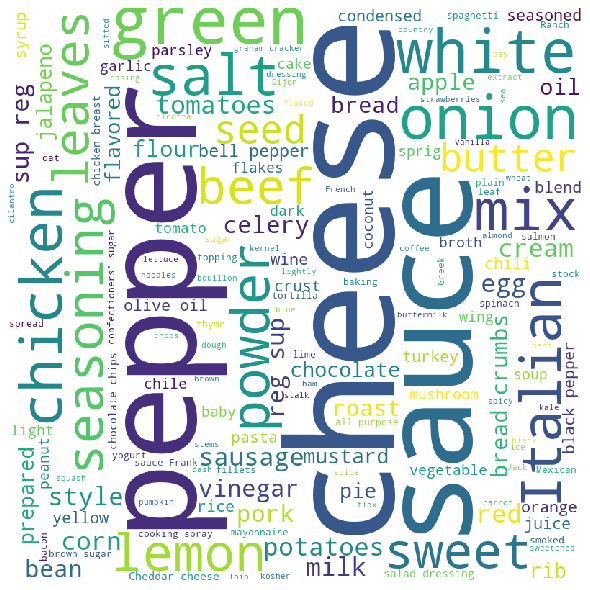

In [19]:
## This graph shows the most popular ingredient words for all 20 years
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = strip_words, 
            min_font_size = 10).generate(words) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [20]:
imin_df_sql = 'select ingred, fame_year from Ingredients natural join Recipes natural join FameYears where fame_year = (select min(fame_year) from FameYears)' 
ingred_by_early_year_cur = cur.execute(imin_df_sql)
ingred_by_early_year_l = list(ingred_by_early_year_cur)
early_year = ingred_by_early_year_l[0][1]
print(early_year)
ingred_by_early_year = get_stripped_ingredients(ingred_by_early_year_l, 0, strip_words)
r = []
for i in ingred_by_early_year:
    if i[2] != '':
        r.append(i[2])
r.sort()
unique_early_ingredients = set(r)
#print(f'\nUnique stripped ingredients: \n{unique_early_ingredients}')
words = ''
for w in unique_early_ingredients:
    words = words + w + ' '+ '1997' + ' '

1997


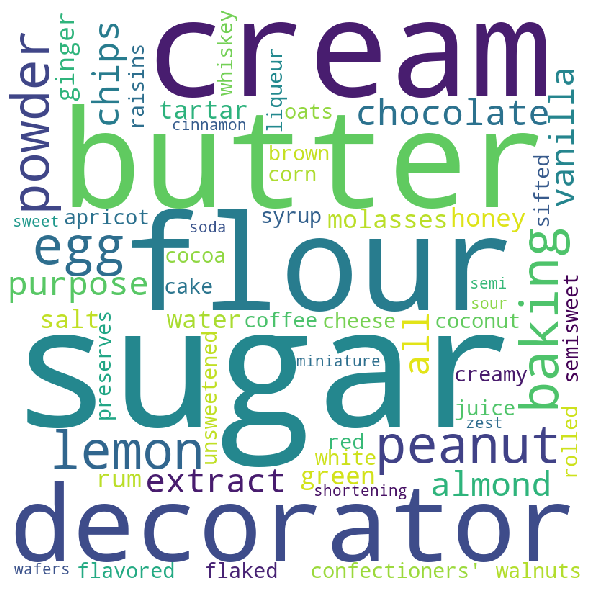

In [21]:
##This graph shows the most popular ingredient words for 1997
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = strip_words, 
            min_font_size = 10).generate(words) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)  
plt.show() 

<br>It's interesting to notice that the 1997 graph ABOVE shows that the community tended to favor baked good's ingredients, such as sugar, flour and butter where in the 2017 graph BELOW, the community seems to favor more savory items such as chicken, cheese and sauce! <br> <br>

In [22]:
imax_df_sql = 'select ingred, fame_year from Ingredients natural join Recipes natural join FameYears where fame_year = (select max(fame_year) from FameYears)' 
ingred_by_last_year_cur = cur.execute(imax_df_sql)
ingred_by_last_year_l = list(ingred_by_last_year_cur)
last_year = ingred_by_last_year_l[0][1]
print(last_year)
ingred_by_last_year = get_stripped_ingredients(ingred_by_last_year_l, 0, strip_words)
r = []
for i in ingred_by_last_year:
    if i[2] != '':
        r.append(i[2])
r.sort()
unique_last_ingredients = set(r)
words = ''
for w in unique_last_ingredients:
    words = words + w + ' '+ '2017' + ' '

2017


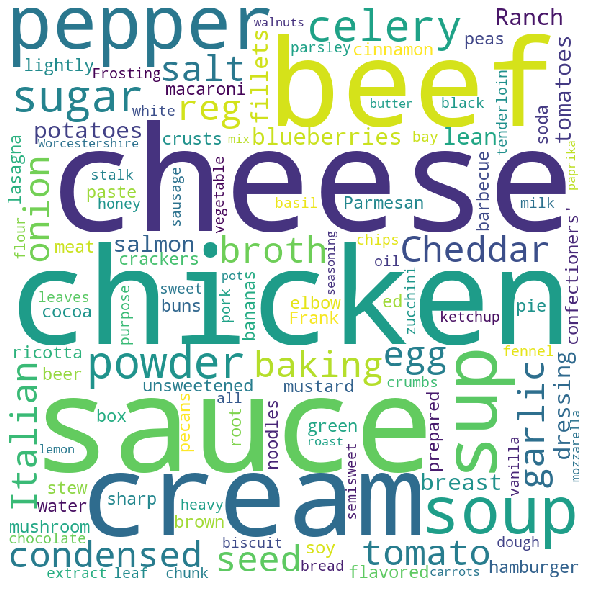

In [23]:
##This graph shows the most popular ingredients words for 2017
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = strip_words, 
            min_font_size = 10).generate(words) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

These graphs above show the most popular single ingredient words over all 20 years and then for the first year (1997) and the most current year (2017). <br>
<br>**Next:**
I am curious if there are trends in ingredients (not just single words, but whole ingredients) over time, so I am going to strip ingredients down to their basics (removing measurements and other descriptive words) and add it to the database for each ingredient item so I can do more analysis across time. 
 - An example of the ingredient stripping would be an ingredient for "1/2 cup finely chopped blanched almonds" would become "almonds"	

In [24]:
i_df_sql = 'select ingred_id, ingred, fame_year from Ingredients natural join Recipes natural join FameYears'
ingred_by_year_df = pd.read_sql(i_df_sql, conn)
#print(f'Dataframe for ingredients by Year: \n{ingred_by_year_df}')

In [25]:
ingred_by_year_df['stripped'] = ingred_by_year_df.apply(lambda x: get_stripped_ingredients(x[1],1, strip_words), axis = 1)
ingred_by_year_df[['ingred','fame_year','stripped']]

,ingred,fame_year,stripped
0,1/2 cup butter,2010,butter
1,1/2 cup butter,2017,butter
2,1 cup white sugar,2010,white sugar
3,1 cup white sugar,2017,white sugar
4,2 eggs,2010,eggs
...,...,...,...
4237,1/2 teaspoon salt,1997,salt
4238,1/2 cup finely chopped blanched almonds,1997,almonds
4239,1/2 teaspoon ground cinnamon,1997,cinnamon
4240,2 teaspoons red decorator sugar,1997,red decorator sugar


In [26]:
# Add stripped column to ingredient table if it does not already exist
check_sql = 'select stripped from ingredients'
try:
    check_cur = cur.execute(check_sql)
except:
    a_sql = 'alter table ingredients ADD stripped text'
    a_cur = cur.execute(a_sql)
    conn.commit()

# Update the Ingredients SQL table by adding the stripped ingredient phrase for analysis
i_list = ingred_by_year_df.values.tolist()
temp =[]
u_sql = 'update ingredients set stripped = ? where ingred_id = ?'
for i in i_list:
    if i[0] not in temp:
        cur.execute(u_sql,( i[3],i[0]) )
        temp.append(i[0])
conn.commit()

In [27]:
'''Re-querying to include stripped ingredient words from database, in order to analyze over time.
    Selecting just the top 7 most popular ingredient words, in order to keep the graphs
    from being overwhelming. '''

get_top_sql = 'select stripped, count(stripped) from ingredients group by stripped order by count(stripped) desc limit 7'
cur.execute(get_top_sql)
top_ingred = cur.fetchall()
top_ingred
top = [top_ingred[i][0] for i in range(len(top_ingred))]
top_df_sql = 'select stripped, fame_year from Ingredients natural join Recipes natural join FameYears where stripped IN (?,?,?,?,?,?,?)'
top_df = pd.read_sql(top_df_sql, conn, params=top )

The graph below shows the trends of the 7 most popular overall ingredients and how they trend through time. They seem to consist of alot of baked goods ingredients. You can see that white sugar is at an all time high (and the most popular ingredient in any year) in 1997 and starts to decrease. 

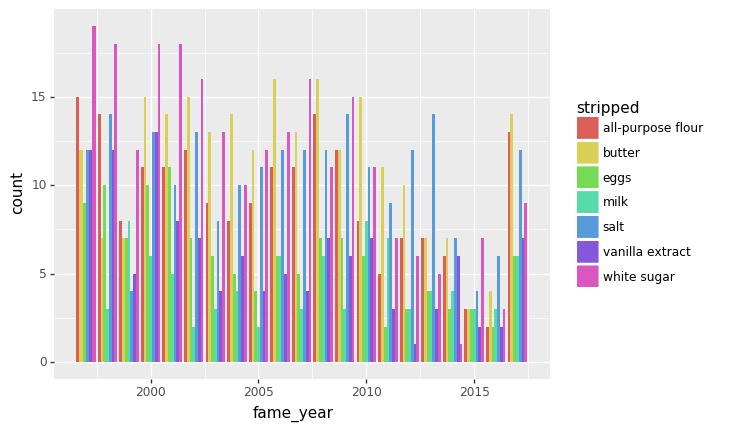

<ggplot: (7546213409)>

In [28]:

ggplot(data = top_df) + aes(x = 'fame_year', fill = 'stripped') + geom_bar(position = "dodge")

I am curious about sugar trends from the 1900's until now, so I gather recipe titles, their fame year and their sugar content into a dataframe for analysis.

In [29]:
sug_df_sql = 'select recipe_id, title, sugar, fame_year from recipes natural join nutrients natural join fameyears order by sugar desc'
sug_df = pd.read_sql(sug_df_sql, conn)

In [30]:
sug_df

,recipe_id,title,sugar,fame_year
0,149,Fresh Southern Peach Cobbler,77.816209,2010
1,113,Apple Crisp with Oat Topping,70.136314,2012
2,127,Best Bread Pudding with Vanilla Sauce,68.130270,2011
3,268,Pecan Pie I,57.704609,1998
4,212,Chocolate Eclair Dessert,56.469061,2003
...,...,...,...,...
414,273,Make Ahead Cookie Mix,0.092888,1998
415,101,Chef John's Perfect Prime Rib,0.023828,2012
416,89,Baked Split Chicken Breast,0.013136,2013
417,22,Mississippi Roast - Slow Cooker Pepperoncini P...,0.005675,2016


The scatter plot shows every recipe over time and their sugar content. The scatter plot is a little busy to read, so I next decide to gather the overall average sugar content per year.

[Text(0, 0.5, 'Sugar Content Per Serving'),
 Text(0.5, 0, 'Fame Year'),
 Text(0.5, 1.0, 'Sugar Content Per Serving Per Recipe By Year')]

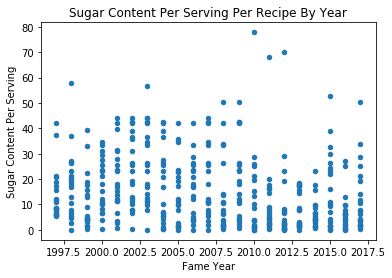

In [31]:
(sug_df
 .plot
 .scatter(x='fame_year', y='sugar')
 .set(title='Sugar Content Per Serving Per Recipe By Year',
      xlabel='Fame Year',
      ylabel='Sugar Content Per Serving'))

In [32]:
av_sug_df_sql = 'select avg(sugar) "sugar", fame_year from recipes natural join nutrients natural join fameyears group by fame_year'
av_sug_df = pd.read_sql(av_sug_df_sql, conn)

The graph below shows the average sugar content for recipes per fame year. It's interesting that it peaked in the early 2000's and has been declining overall. 

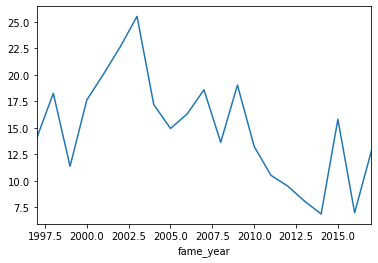

In [33]:
av_sug_df.set_index('fame_year')['sugar'].plot()

I did similar analysis on carbs.

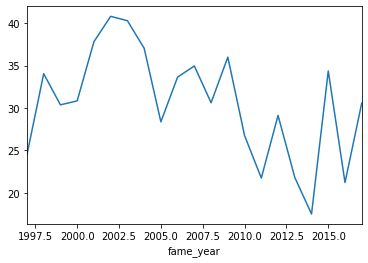

In [34]:
#Average Carbs content for recipes per fame year
av_carbs_df_sql = 'select avg(carbs) "carbs", fame_year from recipes natural join nutrients natural join fameyears group by fame_year'
av_carbs_df = pd.read_sql(av_carbs_df_sql, conn)
av_carbs_df.set_index('fame_year')['carbs'].plot()

I noticed that the graphs of sugar and carb trends seem to correlate so I wanted to overlay them on the same graph using PyGal. They seem to rise and decline together, which makes sense because people tend to eat sugar with carbs (unless they are having a sweet savory dish such as caramel chicken). The graph confirms that the numbers and the data are real and the correlation makes sense.

In [35]:
av_sql = 'select avg(sugar) "sugar", avg(carbs) "carbs", fame_year from recipes natural join nutrients natural join fameyears group by fame_year'
cur.execute(av_sql)
averages = cur.fetchall()
avg = {}
avg['sugar'] = []
avg['carbs'] = []
avg['years'] = []
for i in averages:
    avg['sugar'].append(int(i[0]))
    avg['carbs'].append(int(i[1]))
    avg['years'].append(int(i[2]))

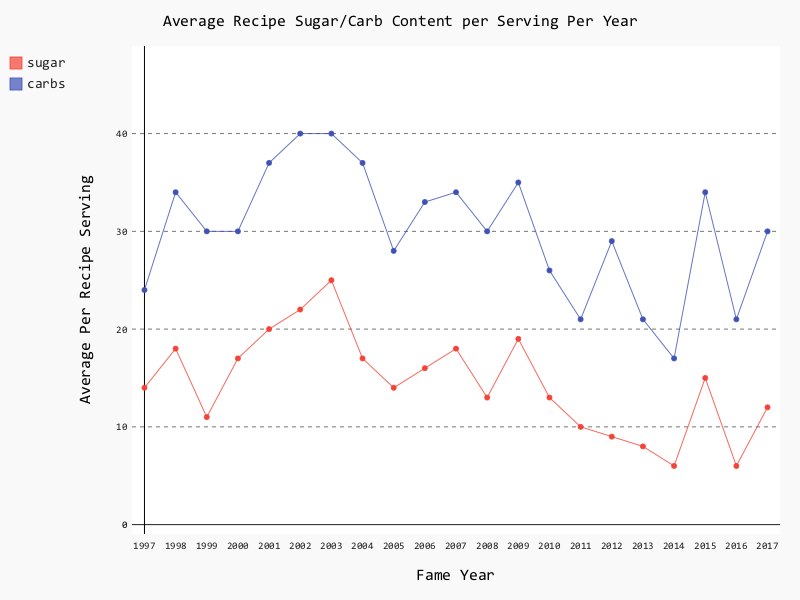

In [36]:
line_chart = pygal.Line()
line_chart.title = "Average Recipe Sugar/Carb Content per Serving Per Year"
line_chart.x_title = "Fame Year"
line_chart.y_title = "Average Per Recipe Serving"
line_chart.x_labels = avg["years"]
line_chart.range=(0, int(1.2*max(max(avg["sugar"]),max(avg["carbs"]) )))
line_chart.add("sugar", avg["sugar"])
line_chart.add("carbs", avg["carbs"])

#line_chart.render_in_browser()                   #execute to see interactive graph in your browser

I did similar analysis on overall fat and saturated fat. The 2 graphs below show that fat content has really fluctuated bouncing up and down, but it does show that the 1990's really were the low-fat craze! <br> <br> I thought we would see a declining trend in saturated fat as heart health and vegan diets have become popular, but apparently their recipes don't quite make it to the Hall of Fame often enough to trend. 

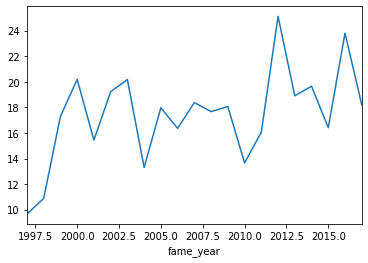

In [37]:
#Average Fat content for recipes per fame year
av_fat_df_sql = 'select avg(totfat) "total_fat", fame_year from recipes natural join nutrients natural join fameyears group by fame_year'
av_fat_df = pd.read_sql(av_fat_df_sql, conn)
av_fat_df.set_index('fame_year')['total_fat'].plot()

I am interested in nutrition and curious how these popular recipes stack up on vitamins and nutrients. In order to analyze this, I created a "nutrient score" algorithm that each recipe will run though with its associated nutrient content (based upon its ingredients) and receive a "nutrient score". <br>  <br> Note: the nutrients included in the nutrient score are: fiber, calcium, magnesium, potassium, iron, zinc, vitA, vitC, vitB1, ribofalvin, niacin, vitB6, folate, vitB12 and vitD. It does not take fat, calories, sugar or carbs into account in this nutrient score. <br> <br>

In [38]:
def get_nutrient_score(x):
    ''' This function returns a "nutrient score", using an algoroithm that cycles
        through all the nutrients and gives points based upon how high they meet
        the recommended daily amounts. 
        
        The nutrients included in the algorithm are:
        fiber, calcium, magnesium, potassium, iron, zinc, vitA, vitC, vitB1, ribf,
        niacin, vitB6, folate, vitB12 and vitD'''
    
    score = 0
    for i in range(len(x)):
        if 2 < x[i] <= 10:
            score += 1
        elif x[i] <= 20:
             score += 2
        elif x[i] <= 30:
             score += 3
        elif x[i] <= 40:
             score += 4
        elif x[i] <= 50:
             score += 5
        elif x[i] <= 60:
             score += 6
        elif x[i] <= 70:
             score += 7
        elif x[i] <= 80:
             score += 8
        elif x[i] <= 90:
             score += 9
        elif x[i] <= 100:
             score += 10
        elif x[i] > 100:
             score += 12
    return score

In [39]:
day_df_sql = 'select dailyp_id, day_fiber, day_calcium, day_magn, day_potas, day_iron, day_zinc, day_vitA, day_vitC, day_vitB1, day_ribf, day_niacin, day_vitB6, day_folate, day_vitB12, day_vitD from Daily_Percents'
day_df = pd.read_sql(day_df_sql, conn)
day_df['nutrient_score'] = day_df.apply(lambda x: get_nutrient_score(x), axis = 1)
day_df

,dailyp_id,day_fiber,day_calcium,day_magn,day_potas,day_iron,day_zinc,day_vitA,day_vitC,day_vitB1,day_ribf,day_niacin,day_vitB6,day_folate,day_vitB12,day_vitD,nutrient_score
0,1,3.410057,1.517865,3.952628,1.245634,8.640293,2.745443,8.370306,0.007292,2.962240,4.517946,1.899027,1.146873,3.777427,2.684297,1.710208,23
1,2,10.893438,38.935614,15.950350,18.168858,47.073804,34.897449,18.216434,18.804553,15.495959,30.207579,26.567369,33.801238,8.438556,60.496009,2.335591,47
2,3,4.759177,2.378374,7.302673,2.360418,18.159833,5.022131,7.830787,0.070417,12.429493,9.152500,6.607086,3.717256,13.545000,1.998785,1.435556,22
3,4,1.895350,19.910112,2.626281,1.792144,17.770766,3.452864,6.951167,0.000000,16.994844,15.914308,8.899681,2.564212,18.198844,9.518854,4.507708,24
4,5,5.059524,1.914771,4.565469,4.322123,15.906016,2.866042,8.608241,4.229167,15.036979,13.140128,9.626586,14.300913,18.279427,3.327604,1.925278,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,285,8.925446,5.250828,14.496924,3.820109,22.401455,7.672449,0.849383,0.000000,12.171551,18.883684,8.362498,2.874081,12.601111,1.771759,0.652963,37
285,286,3.464013,2.377442,7.129472,2.371315,14.114799,5.133212,5.641605,0.069753,12.198553,10.347115,17.645691,6.262286,15.156146,2.218403,1.283519,34
286,287,0.837649,0.426457,0.658450,0.675894,6.467725,0.903552,6.005481,0.000000,6.894825,4.758026,3.874050,0.560262,7.803292,1.067500,0.952556,36
287,288,1.878435,3.426946,1.905417,1.282162,35.292646,2.931686,9.699444,0.095833,28.029524,15.188894,15.859965,1.857734,26.818125,3.116840,1.659167,42


In [40]:
# If nutrient-score does not exist in the Daily_Percents table, 
# Alter Daily_Percents SQL Table to include nutrient_score column

check_sql = 'select nutrient_score from Daily_Percents'
try:
    check_cur = cur.execute(check_sql)
except:
    adp_sql = 'alter table Daily_Percents ADD nutrient_score integer'
    a_cur = cur.execute(adp_sql)
    conn.commit()
## Updating the Daily_Percents SQL table by adding the nutrient score for analysis
day_list = day_df.values.tolist()
d_sql = 'update Daily_Percents set nutrient_score= ? where dailyp_id = ?'
for d in day_list:
    cur.execute(d_sql,( d[-1],d[0]) )
conn.commit()

In [41]:
# Data on nutrients, ignoring fat, sugar, etc... just daily percentages of nutrients
nscore_sql = 'select recipe_id, title, nutrient_score, fame_year from recipes natural join FameYears natural join daily_percents order by fame_year, nutrient_score desc'
nscore_df = pd.read_sql(nscore_sql, conn)
nscore_df

,recipe_id,title,nutrient_score,fame_year
0,288,Sour Cream Cut-Outs,42,1997
1,282,Shortbread Supreme,40,1997
2,274,Chocolate Chip Cookies I,39,1997
3,281,Rum or Bourbon Balls,39,1997
4,277,Snickerdoodles II,37,1997
...,...,...,...,...
414,13,Carrot Cake III,24,2017
415,1,Best Brownies,23,2017
416,5,Banana Banana Bread,23,2017
417,8,Mom's Zucchini Bread,23,2017


[Text(0, 0.5, 'Nutrient Score Per Serving'),
 Text(0.5, 0, 'Fame Year'),
 Text(0.5, 1.0, 'Nutrient Score Per Serving Per Recipe By Year')]

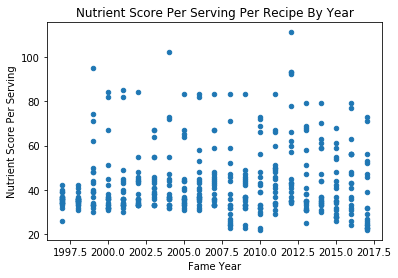

In [42]:
(nscore_df
 .plot
 .scatter(x='fame_year', y='nutrient_score')
 .set(title='Nutrient Score Per Serving Per Recipe By Year',
      xlabel='Fame Year',
      ylabel='Nutrient Score Per Serving'))

Looking at average nutrient score per year to see if any overall trends through the years.

In [43]:
n_avg_score_sql = 'select cast(avg(nutrient_score) as int) "average_nutrient_score", fame_year from recipes natural join FameYears natural join daily_percents group by fame_year'
n_avg_score_df = pd.read_sql(n_avg_score_sql, conn)

Interesting that 2012 seemed to be the peak for healthy popular recipes!

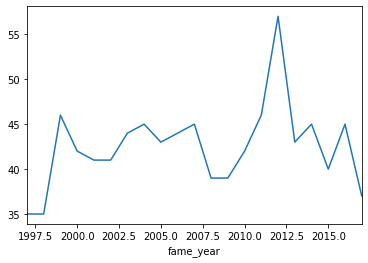

In [108]:
#Average Nutrient Score for recipes per fame year
n_avg_score_df.set_index('fame_year')['average_nutrient_score'].plot()

In [44]:
# pygal  - casting numpy types to int.
years = list(n_avg_score_df["fame_year"].values)
years_int = []
for y in years:
    years_int.append(int(y))
avg_nutrient_score = list(n_avg_score_df['average_nutrient_score'].values)
avg_int = []
for i in avg_nutrient_score:
    avg_int.append(int(i))

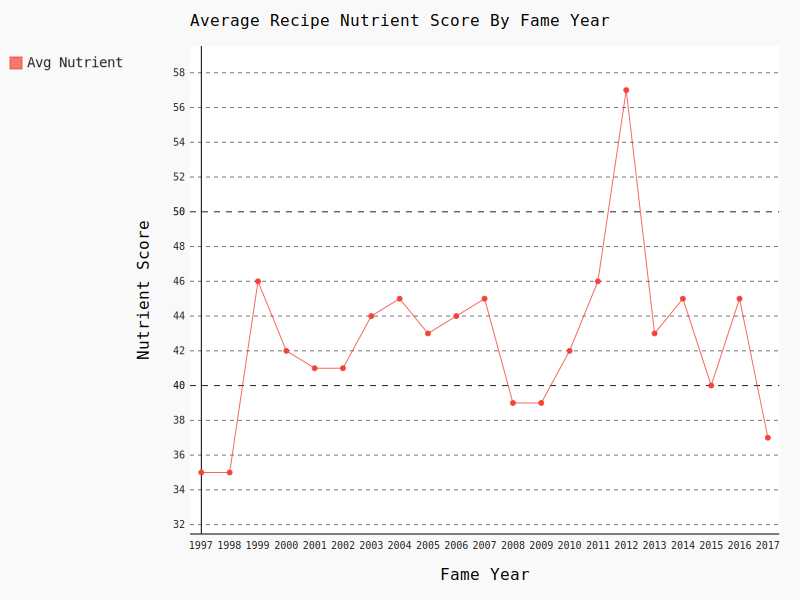

In [45]:
line_chart = pygal.Line()
line_chart.title = "Average Recipe Nutrient Score By Fame Year"
line_chart.x_title = "Fame Year"
line_chart.y_title = "Nutrient Score"
line_chart.x_labels = years_int
line_chart.range=(32, int(1.05*max(avg_int)))
line_chart.add("Avg Nutrient", avg_int)
display(SVG(line_chart.render(disable_xml_declaration=True)))
#line_chart.render_in_browser()                          #execute to show graph in browser

<br>I am curious which nutrients we have the hardest time getting through our favorite recipes. This could give us insight on which vitamins we need to focus on adding to our diet. First I do the analysis per year to see if there are trends about the lowest nutrients. <br> <br>Vitamin D was the lowest for every year except 3! So, I excluded Vitamin D to see other culprits that our favorite recipes run low on. You can see in the table below, besides Vitamin D, it was fiber 8 years, potassium 7 years, vitamin C 4 years and calcium 2 years. 
Scroll to the right to see the min_nutrient column. <br> <br>

In [46]:
def get_min_nutrient(x):
    min_index = 0
    min_value = x[0]
    for i in range(len(x)-3):
        if x[i] <= min_value:
            min_index = i
            min_value = x[i]
    return min_index

In [47]:
avg_df_sql = 'select avg(day_fiber) "fiber", avg(day_calcium) "calcium", avg(day_magn) "magnesium", avg(day_potas) "potassium", avg(day_iron) "iron", avg(day_zinc) "zinc", avg(day_vitA) "vitamin A", avg(day_vitC) "vitamin C", avg(day_vitB1) "vitamin B1", avg(day_ribf) "riboflavin", avg(day_niacin) "niacin", avg(day_vitB6) "vitamin B6", avg(day_folate) "folate", avg(day_vitB12) "vitamin B12", avg(day_vitD) "vitamin D", fame_year from Daily_Percents natural join Recipes natural join FameYears group by fame_year'
avg_df = pd.read_sql(avg_df_sql, conn)

<br>**Scroll to the far right in the table below to see the min_nutrient column.** <br> <br>

In [48]:
avg_df['min_nutrient'] = avg_df.columns[avg_df.apply(lambda x: get_min_nutrient(x), axis = 1)]
avg_df

,fiber,calcium,magnesium,potassium,iron,zinc,vitamin A,vitamin C,vitamin B1,riboflavin,niacin,vitamin B6,folate,vitamin B12,vitamin D,fame_year,min_nutrient
0,2.922549,2.026516,4.862946,1.579183,12.427684,3.083252,3.887646,0.050569,8.987709,6.857478,6.232229,2.253895,9.476161,1.286913,0.784747,1997,vitamin C
1,3.637010,4.698288,4.042351,1.819722,13.939022,3.630123,4.197054,0.992030,13.234464,9.750792,7.122623,3.638508,13.390641,2.942539,1.036377,1998,vitamin C
2,6.475183,8.015368,9.211430,9.688172,21.746556,13.805385,10.098458,13.826366,20.658196,16.046427,30.419869,35.290662,11.033421,24.581651,2.421278,1999,fiber
3,6.012908,9.518373,8.450429,5.670657,17.999696,8.784645,22.830483,15.039742,13.382369,13.786352,11.846041,12.734453,13.923048,10.597496,1.542713,2000,potassium
4,5.964075,10.717570,7.447554,5.199829,21.200387,9.870044,9.960812,6.254404,20.895673,16.408554,16.005683,14.031626,16.161221,13.602718,2.592122,2001,potassium
5,6.722404,9.221134,8.025680,5.923365,17.554499,7.646212,21.019497,9.818545,13.901686,15.561359,17.085310,16.037450,14.048523,17.162314,1.652345,2002,potassium
6,7.804685,7.767525,10.206474,7.123273,24.074251,11.790035,20.992481,20.945563,14.752659,15.548025,16.806703,16.132720,18.381481,30.348285,3.051241,2003,potassium
7,12.037441,8.675014,11.386321,9.114410,28.369619,10.416562,18.582319,12.539896,16.398345,16.447270,19.921384,21.272111,18.318590,12.728225,2.025882,2004,calcium
8,7.083369,10.793200,9.813816,6.312185,19.731537,8.660008,21.668388,11.070723,13.426812,16.089175,19.571896,19.577596,15.101116,17.247510,2.346244,2005,potassium
9,7.173871,8.934279,9.784589,8.784757,21.432529,10.232775,19.009126,8.837466,18.515973,19.116565,29.729431,30.332474,15.041687,18.112880,3.069788,2006,fiber


I analyzed the overall averages for every nutrient to see if there were trends overall. (Note that these percentages are per serving for a recipe and the numbers represent the overall daily percentage, so 25% or 30% is not bad if you still have 2 other meals in that day.) The pie chart shows that we especially need to add more Vitamin D, fiber, potassium, magnesium and calcium to our diets. 

In [49]:
all_avg_df_sql = 'select avg(day_fiber) "fiber", avg(day_calcium) "calcium", avg(day_magn) "magnesium", avg(day_potas) "potassium", avg(day_iron) "iron", avg(day_zinc) "zinc", avg(day_vitA) "vitamin A", avg(day_vitC) "vitamin C", avg(day_vitB1) "vitamin B1", avg(day_ribf) "riboflavin", avg(day_niacin) "niacin", avg(day_vitB6) "vitamin B6", avg(day_folate) "folate", avg(day_vitB12) "vitamin B12", avg(day_vitD) "vitamin D" from Daily_Percents natural join Recipes'
all_avg_df = pd.read_sql(all_avg_df_sql, conn)
all_avg_df
a = []
b = []
for i in range(len(all_avg_df.columns)):
    a.append(all_avg_df.columns[i])
all = {}
all['nutrients'] = a
for i in range(len(all_avg_df.columns)):
    b.append(int(all_avg_df.iloc[0,i]))
all['values'] = b
all['values'] = all_avg_df.iloc[0]
df = pd.DataFrame(sorted(list(zip(a,b)), key=lambda x: x[1]), columns =["nutrients","values"])

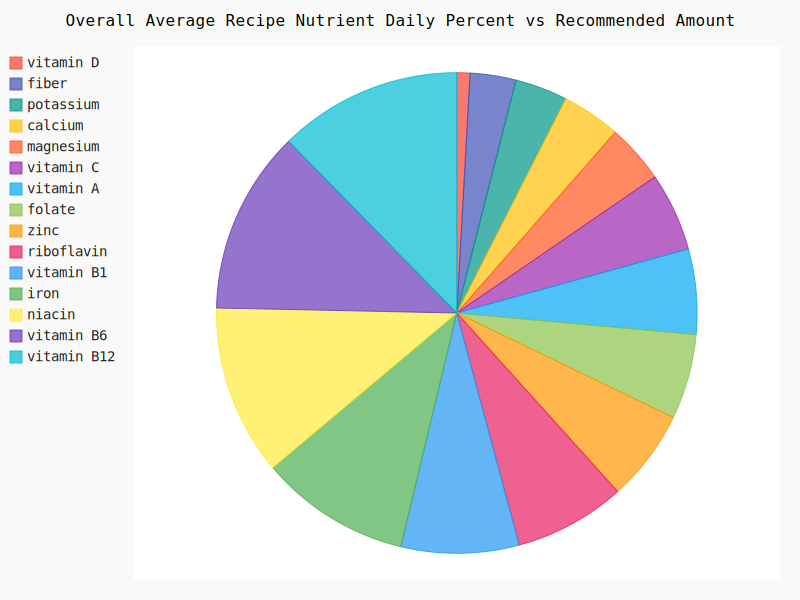

In [50]:
pie_chart = pygal.Pie()
pie_chart.title = "Overall Average Recipe Nutrient Daily Percent vs Recommended Amount"
for i, row in df.iterrows():
    if i < len(df):
        pie_chart.add(row["nutrients"], row["values"])
#pie_chart.render_in_browser()
display(SVG(pie_chart.render(disable_xml_declaration=True)))

I am also showing this as a bar chart for easy and sorted readability.

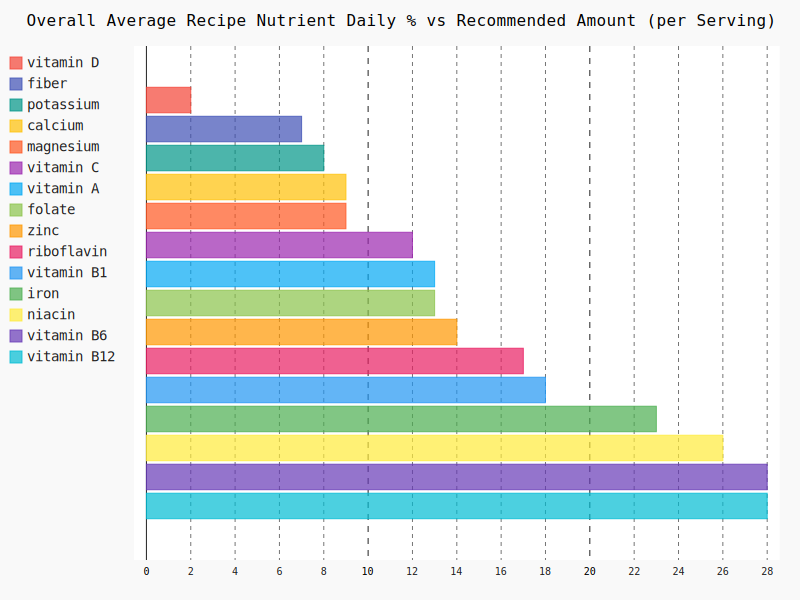

In [51]:
line_chart = pygal.HorizontalBar()
line_chart.title = 'Overall Average Recipe Nutrient Daily % vs Recommended Amount (per Serving)'
for i, row in df.iterrows():
    if i < len(df):
        line_chart.add(row['nutrients'], row['values'])
# line_chart.render_in_browser()                  # execute to see interactive in browser
display(SVG(line_chart.render(disable_xml_declaration=True)))

I am curious to know which of these popular recipes are nutrient-dense while also taking into account which recipes are the most popular, indicating they are really yummy!. Some people may also be interested in lowering their sugar conent or their saturated fat. So, I created a chart below to include all these different factors. This chart includes only the top 30 recipes, sorted by my nutrient score. The recipe titles are a little squished in this graph. I had trouble getting space to show all the long recipe titles where they wanted to overlap.

In [52]:
s_sql = 'select recipe_id, title, nutrient_score, satfat, num_reviews, sugar  from recipes natural join daily_percents natural join nutrients order by nutrient_score desc, satfat '
s_df = pd.read_sql(s_sql, conn)
nut = list(s_df['nutrient_score'])
adj = []
for n in nut:
    if n in adj:
        n = n-.33
        if n in adj:
            n = n-.33
    adj.append(n)
s_df['adj_nutrient_score'] = adj
sm_df = s_df[0:30]

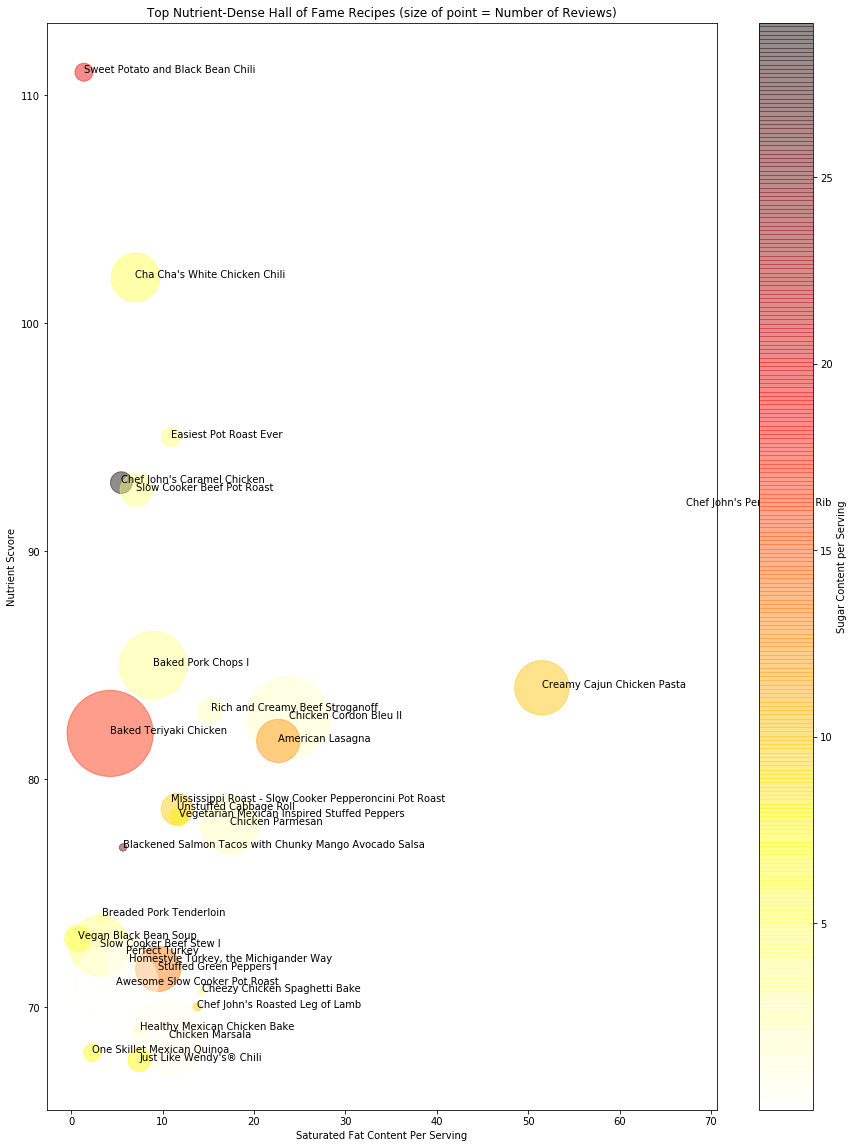

In [53]:
x = sm_df['satfat']
y = sm_df['adj_nutrient_score']
sizes = sm_df['num_reviews']      
colors = sm_df['sugar'] 
fig, ax = plt.subplots(figsize=(15, 20))
plt.scatter(x, y, c=colors, s=sizes, alpha=0.45,     
            cmap='hot_r')
cb = plt.colorbar()
cb.set_label('Sugar Content per Serving')
plt.xlabel("Saturated Fat Content Per Serving")
plt.ylabel("Nutrient Scvore")
plt.title('Top Nutrient-Dense Hall of Fame Recipes (size of point = Number of Reviews)')
for i, row in sm_df.iterrows():                 
    ax.annotate(sm_df.loc[i]['title'], (x.loc[i], y.loc[i]))
plt.savefig('popular_nutritious.png', bbox_inches='tight')        

You can see that the Baked Teriyaki Chicken is super popular and low in saturated fat, but does have some sugar. 

Cha Cha's White Chicken Chili is low in sugar and saturated fat, nutrient-dense and pretty popular. I think I'll try it! 

And the Sweet Potato Black Bean Chili is super nutrient-dense! 

Below is this information in a tabular view. (satfat is saturated fat) <br> <br>

In [54]:
s = s_df.loc[0:30,['title','nutrient_score','satfat','num_reviews','sugar']]
s

,title,nutrient_score,satfat,num_reviews,sugar
0,Sweet Potato and Black Bean Chili,111,1.394586,323,19.228427
1,Cha Cha's White Chicken Chili,102,7.032836,2352,5.487034
2,Easiest Pot Roast Ever,95,10.929309,359,4.151400
3,Chef John's Caramel Chicken,93,5.481134,471,29.138371
4,Slow Cooker Beef Pot Roast,93,7.119465,1042,3.814892
5,Chef John's Perfect Prime Rib,92,67.283583,1306,0.023828
6,Baked Pork Chops I,85,8.958150,4534,3.662189
7,Creamy Cajun Chicken Pasta,84,51.501103,2968,10.184936
8,Rich and Creamy Beef Stroganoff,83,15.244089,613,2.218329
9,Chicken Cordon Bleu II,83,23.787644,6780,1.773653


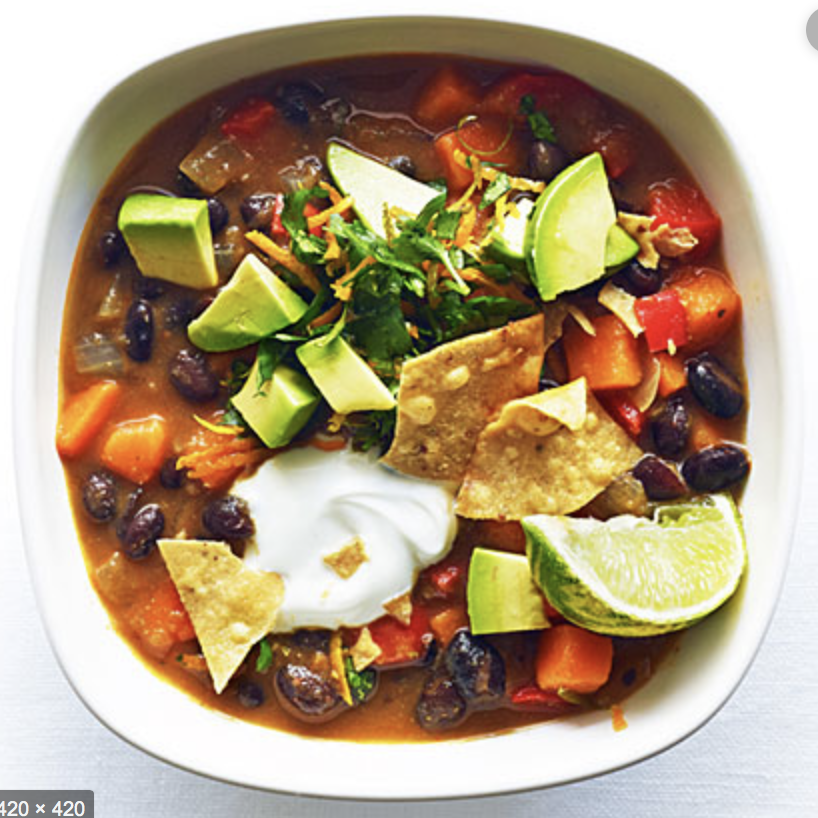

In [59]:
Image('ss2.png')

### List of 25 nutrient-dense Hall of Fame recipes 
###      - with less than 10 grams of saturated fat per serving 
###      - and at least 50 reviews.

In [55]:
f_sql = 'select title, nutrient_score, satfat, num_reviews, sugar from recipes natural join daily_percents natural join nutrients where satfat <=10 and num_reviews>50 order by nutrient_score desc, satfat '
f_df = pd.read_sql(f_sql, conn)
f_df[0:25]

,title,nutrient_score,satfat,num_reviews,sugar
0,Sweet Potato and Black Bean Chili,111,1.394586,323,19.228427
1,Cha Cha's White Chicken Chili,102,7.032836,2352,5.487034
2,Chef John's Caramel Chicken,93,5.481134,471,29.138371
3,Slow Cooker Beef Pot Roast,93,7.119465,1042,3.814892
4,Baked Pork Chops I,85,8.958150,4534,3.662189
5,Baked Teriyaki Chicken,82,4.255730,7420,16.768865
6,Blackened Salmon Tacos with Chunky Mango Avoca...,77,5.666015,56,25.239935
7,Breaded Pork Tenderloin,74,3.372891,120,1.712661
8,Vegan Black Bean Soup,73,0.719580,677,6.946026
9,Slow Cooker Beef Stew I,73,3.102761,3632,4.210665


In [56]:
f_df[0:25]['title']

0                     Sweet Potato and Black Bean Chili
1                         Cha Cha's White Chicken Chili
2                           Chef John's Caramel Chicken
3                            Slow Cooker Beef Pot Roast
4                                    Baked Pork Chops I
5                                Baked Teriyaki Chicken
6     Blackened Salmon Tacos with Chunky Mango Avoca...
7                               Breaded Pork Tenderloin
8                                 Vegan Black Bean Soup
9                               Slow Cooker Beef Stew I
10                                       Perfect Turkey
11                Homestyle Turkey, the Michigander Way
12                              Stuffed Green Peppers I
13                        Awesome Slow Cooker Pot Roast
14                         Healthy Mexican Chicken Bake
15                           One Skillet Mexican Quinoa
16                             Just Like Wendy's® Chili
17                           Strawberry Spinach 

### The remaining code below is for running the webscrapers and API....

 - Go to the very bottom if you wish to run these.

In [ ]:
# This cell is for running from the command line as a python executable file

if __name__ == "__main__":
        parser = argparse.ArgumentParser()
        parser.add_argument('-source',type=str, 
                            help='Required Keyworded argument. Enter remote to pull remote data using webscraping and APIs. Enter local to run straight from databases. Enter noapi to web-scrape only and not access API.')
        args = parser.parse_args()
        run_type = args.source
        print(f'Program was run in {run_type} mode.')
        print('Processing...\n')
        main(run_type)
        


### If you want to run web-scrapers and API (within Jupyter Notebook) and create a new Recipes.db database in your local environment, uncomment and execute main in 'remote' mode. 
###  - For remote mode, enter your Edamam APP KEY and APP ID into the parameters within quotes.

### To run in local mode, uncomment and execute main in the 'local' mode as is with 'nan' params. This uses the existing database Recipes.db that was in the github repo. <br> <br>

In [7]:

#main('remote', 'YOUR_APP_KEY', 'YOUR_APP_ID')   

#main('local', 'nan', 'nan')
